# Energy and number densities
As we mention in single field inflation(python), consider a model whose dynamics is governed by the following action:
\begin{equation}
    S=\int d^4x\sqrt{-g}\left[\frac{M_p^2}{16\pi}R-\frac{1}{2}\left(\partial\phi\right)^2-V(\phi)\right]\,,
\end{equation}
where $M_p$ is non-reduced plank mass.
We work with the spatially flat Friedmann-Robertson-Walker (FRW) universe described by the line-element:
$$
    ds^2=-dt^2+a^2(t)dx^2\,,
$$
where $a(t)$ is scale factor and $t$ is the cosmic time.
Equation of motion (Klein-Gordon equation) and Friedmann equation are:
$$
    \ddot \phi+3H\dot\phi+V_{,\phi}=0\qquad
    H^2=\frac{8\pi}{3M_p^2}(\frac{1}{2}\dot\phi^2+V(\phi))\,.
$$

We select $V=\frac{1}{2}m^2\phi^2$ and define
$$\dot\phi=\sqrt{\frac{3}{4\pi}}H\sin\theta\qquad m\phi=\sqrt{\frac{3}{4\pi}}H\cos\theta\,.$$
By combining the above equations, it is easy to obtain two first order differential equations* (Stars indicate details that will be presented in the appendix, because too much detail would obscure the main idea.):
$$\dot H=-3H^2\sin^2\theta\,,$$
$$\dot\theta=-m-\frac{3}{2}H\sin(2\theta)\sim -m\,.$$
Integral equation of Huabble constant, we obtain**:
$$H(t)=\frac{2}{3t}\left(1-\frac{\sin(2mt)}{2mt}\right)^{-1}\,.$$
Taking into equation of $\phi$, we get
$$\phi(t)=\Psi(t)\cos(mt)\left(1+\frac{\sin(2mt)}{2mt}\right)\,.$$
$$\Psi(t)=\frac{M_p}{\sqrt{3\pi}mt}\,,$$
The behavior of scale factor is 
$$a\sim t^{2/3}\,,$$
becasue $H\sim t^{-1}$. The energy density of the field $\phi$ decreases in the same way as the non relativistic praticles of mass $m$:
$$\rho_\phi=\frac{1}{2}\dot\phi^2+\frac{1}{2}m^2\phi^2\sim a^{-3}\,.$$

The inflaton oscillations can be interpreted as a collection of scalar particles, independent from each other, oscillating coherently at the same frequency $m$. For time intervals larger than the oscillating period, the energy and number densities are related to the amplitude $\Psi$ in a simple way:
$$\rho_\phi=\frac{1}{2}m^2\Psi^2\qquad n_\phi=\frac{1}{2}m\Psi^2\,.$$

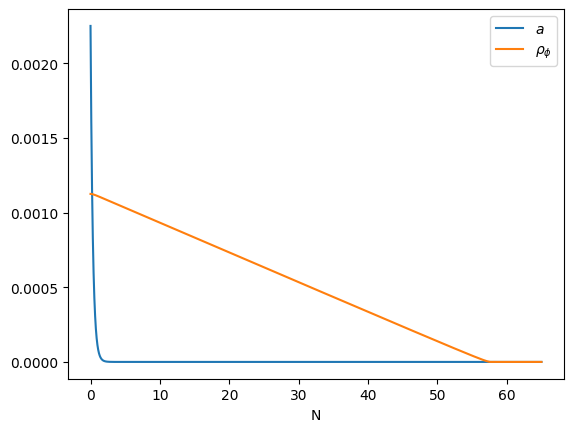

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

m_p = 1 
m = 1e-5 * m_p

xi = 15  # initial field value
yi = 0  # initial field velocity
zi = np.sqrt(yi**2/6*m_p**2 + m**2*xi**2/6*m_p**2) # initial value of hubble parameter
ai = 1  # initial value of scale factor

def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
    x, y, z, a = var
    dxdN = y
    dydN = -(3 - 0.5 * y**2) * y - m**2 * x / (z**2*m_p**2)
    dzdN = -0.5 * z * y**2
    dadN = a
    return [dxdN, dydN, dzdN, dadN]

N = np.linspace(0, 65, 10000)  # Time points where solution is needed

# invoking the ODE solver
sol = solve_ivp(sys, [N[0], N[-1]], [xi, yi, zi, ai], t_eval=N, rtol=1e-8, atol=1e-10, method='RK45')
#t = sol.t
x, y, z, a = sol.y
phi, phi_N, H = x*m_p, y*m_p, z*m_p

rho_phi=0.5*H**2*phi_N**2+0.5*m*phi**2
plt.plot(N, 2*rho_phi[0]*a**-3, label=r'$a^{-3}$')
plt.plot(N, rho_phi, label=r'$\rho_\phi$')
plt.legend()
plt.xlabel('N')
plt.show()

## Boltzmann equation
We consider an infalton field $\phi$ of mass $m$ coupled to a scalar field $\xi$ of mass $m_\xi$. The simplest interactions are descrived by three-legged diagrams, which correspond to the following terms in the Lagrangian:
$$\mathcal{L}_{\text{int}}=-\frac{1}{2}g\phi\xi^2\,,$$
and the total Lagrangian is 
$$\mathcal{L}=-\frac{1}{2}(\partial\phi)^2-V(\phi)-\frac{1}{2}(\partial\xi)^2-V(\xi)-\frac{1}{2}g\phi\xi^2\,.$$
The decay rate of the inflaton field into $\xi\xi$ pair is determined by the coupling constant $g$.
Decay rate can be calculated (***):
$$\Gamma(\phi\rightarrow\xi\xi)=\frac{g^2}{8\pi m}\,.$$
<!-- Note that when we discuss single field inflation, $m$ refers to the mass of the inflation $\phi$. -->
In order to consider the effects related to particle production, let us consider the following Klein Gordon equation describing the homogeneous scalar field:
$$\ddot \phi+3H(t)\dot\phi+\left(m^2+\Pi(\omega)\right)\phi=0$$
where $\Pi(\omega)$ is the inflaton polarisation operator with 4-momentum $k = (\omega, 0, 0, 0)$. Neglecting for simplicity the time dependance of $H$ and $\text{Im} \Pi$, EOM has the following solution
$$\phi(t)\sim \Phi(t)\sin(mt)\,,$$
$$\Phi(t)=\Phi_0 \exp\left[-\frac{1}{2}\left(3H+\frac{\text{Im}\Pi(m)}{m}\right)t\right]=\Phi_0 \exp\left[-\frac{1}{2}(3H+\Gamma)t\right]\,.$$
where we use optical theorem $\text{Im}\Pi(\omega)=m\Gamma_\phi$(****) and $\Phi$ is a constant. As we mentioned $\rho_\phi\sim \Psi^2$，by using a similar method, we can naturally obtain $\rho_\phi\sim\Phi^2$. The particle density and number density obey the equations:
$$\frac{d\rho_\phi}{dt}=(-3H-\Gamma)\rho_\phi\qquad\frac{dn_\phi}{dt}=(-3H-\Gamma)n_\phi\,.$$
Taking into account the expansion of the universe, the equations for the number density of $\phi$ particles can be written as:
$$\frac{d}{dt}(a^3 n_\phi)=a^3\frac{dn_\phi}{dt}+3a^2\dot a n_\phi=(-3H-\Gamma)a^3 n_\phi+3a^3H n_\phi=-\Gamma a^3 n_\phi\,,$$
we obtain Boltzmann equation. The comving number density of $\phi$ particles exponentially decreases with the decay rate $\Gamma$
$$a^3 n_\phi=C_0 e^{-\Gamma t}\,.$$
The number density of particle $\chi$ can be written as:
$$\frac{1}{a^3}\frac{d(a^3n_\chi)}{dt}=2\Gamma n_\phi$$
where the coefficient 2 arises because one $\phi$ particle decays into two $\chi$ particles.

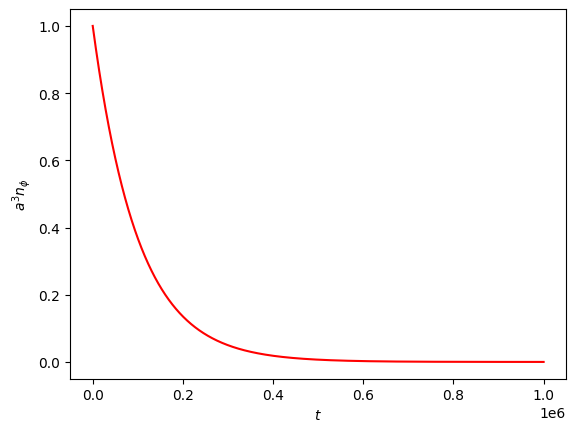

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
Gamma=1e-5
C0=1
t=np.linspace(0, 1000000, 10000)
comving_nd_p=C0*np.exp(-Gamma*t)
plt.plot(t, comving_nd_p, 'r')
plt.xlabel(r'$t$')
plt.ylabel(r'$a^3 n_\phi $')
plt.show()
# Gamma=1e-5
# rho_phii = 0.5*15**2*1e-8 
# rho_chii = 0


# def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
#     rho_phi, rho_chi = var
#     drho_phidt = (-rho_phi-rho_chi-Gamma)*rho_phi
#     drho_chidt = (-rho_phi-rho_chi+2*Gamma)*rho_phi
#     return [drho_phidt, drho_chidt]

# t= np.linspace(0, 400000, 10000)  # Time points where solution is needed

# # invoking the ODE solver
# sol = solve_ivp(sys, [N[0], N[-1]], [rho_phii, rho_chii], t_eval=t, rtol=1e-8, atol=1e-10, method='RK45')
# t = sol.t
# com_n_phi, com_n_chi= sol.y

# plt.plot(t, com_n_phi, 'r',label=r'$\rho_\phi$')
# plt.plot(t, com_n_chi, 'b',label=r'$\rho_\chi$')
# plt.xlabel(r'$t$')
# plt.legend()
# plt.show()

## The reheating temperature
AS we mentioned in single inflation.inbpy, we got:
$$
H\sim \frac{2}{3t} \qquad \rho_\phi\sim a^{-3}
$$
The inflaton energy density is transferred to the relativistic decay products, the energy density of which decreasing much faster than the energy of the oscillating field $\phi$.

The reheating process eventually ends when $H < \Gamma_\phi$. The reheating time is defined as the time at which the transition between these two regimes occurs
\begin{equation}
t_{reh}\sim\frac{2}{3H}\sim\frac{2}{3\Gamma_\phi}
\end{equation}

The inflaton energy density:
\begin{equation}
\rho=\frac{1}{2}m^2\Psi^2=\frac{1}{2}m^2 \frac{M_p^2}{3\pi m^2 t_{reh}^2}=\frac{3M_p^2\Gamma_\phi^2}{8\pi }
\end{equation}
and one of a thermal bath:
\begin{equation}
\rho_{rad}=\frac{\pi^2}{30}g_*T^4_R
\end{equation}
where $g_*$ is degree of freedom. Reheating temprature:
\begin{equation}
T_R=\left[\frac{3M_p^2 \Gamma_\phi^2}{8\pi}\cdot\frac{30}{\pi^2 g_*}\right]^{1/4}\approx 0.2(200/g_*)^{1/4}\sqrt{\Gamma_\phi M_p}
\end{equation}

Look, it is only depend on particle theory parameters and not on teh initial value of $\phi$. Let's show some examples:

1. $h\sim 10^{-2}$,$m\sim 10^{-6}M_p\sim 10^{13}GeV$, and $g_*=100$
\begin{equation}
\Gamma_\phi=\frac{h^2 m}{8\pi}\sim10^7 GeV
\end{equation}
\begin{equation}
T_R= 0.2(200/100)^{1/4}\sqrt{10^8 \cdot 10^{19} GeV^2}\sim 10^{12}GeV
\end{equation}



In [21]:
import numpy as np
mp=10**19
h=10**-2#or g^2
m=10**-6*mp
g=100
Gamma=h**2*m/(8*np.pi)
print('Gamma='+'%.2e' %Gamma+'GeV')
T_R=0.2*(200/g)**0.25*(Gamma*mp)**0.5
print('T_R='+'%.2e' %T_R+'GeV')

Gamma=3.98e+07GeV
T_R=4.74e+12GeV


Baryogenesis, gravitinos, leptogenesis seem to have imposed restrictions on this temperature.

## Appendix
* 1. $$\dot\phi=\sqrt{\frac{3}{4\pi}}Hsin\theta\qquad m\phi=\sqrt{\frac{3}{4\pi}}Hcos\theta\,.$$
derive the second equation, we get
$$m\dot\phi=\sqrt{\frac{3}{4\pi}}\dot H\cos\theta-\sqrt{\frac{3}{4\pi}}H\dot\theta\sin \theta=\frac{\dot H}{H}m\phi-\dot\phi\dot\theta\,.$$
Rewrite the expression of $\theta$
$$\dot\theta=\frac{\frac{\dot H }{H}m\phi-m\dot\phi}{\dot\phi}\,.$$
Derive the second equation, we get
$$\ddot \phi=\sqrt{\frac{3}{4\pi}}\dot H \sin\theta+\sqrt{\frac{3}{4\pi}}H\dot\theta\cos\theta=\frac{\dot H}{H}\dot\phi+m\phi\dot\theta\,.$$
Taking $\ddot\phi$ and $\dot\theta$ into EOM, we get
$$\ddot \phi+3H\dot\phi+m^2\phi=\frac{\dot H}{H}\dot\phi+m\phi\frac{\frac{\dot H }{H}m\phi-m\dot\phi}{\dot\phi}+3H\dot\phi+m^2\phi=0$$
$$\frac{\dot H}{H}\dot\phi^2+m^2\phi^2\frac{\dot H }{H}-m^2\phi\dot\phi+3H\dot\phi^2+m^2\phi\dot\phi=0$$
$$\frac{\dot H}{H}\left(\dot\phi^2+m^2\phi^2\right)=m^2\phi\dot\phi-3H\dot\phi^2-m^2\phi\dot\phi$$
$$\dot H=-3H^2sin^2\theta$$
Taking $\dot H$ into $\dot \theta$, we get
$$\dot\theta=-m-\frac{3}{2}Hsin(2\theta)$$
Of course, one can also use $\tan\theta$, but the results are the same.  Since $\dot H$ is always negative, the second term of $\dot\theta$ describes oscillations with decaying amplitude. Therefore, neglecting this term we obtain:
$$\dot\theta\sim -m\qquad \theta\sim -mt+\alpha$$
where $\alpha$ is the constant can be set to zero.
* 2. $$\dot H=-3H^2sin^2\theta$$
$$\frac{dH}{H^2}=-3sin^2(mt)dt$$
$$\frac{1}{H}=\frac{3}{m}\left(\frac{1}{2}mt-\frac{1}{4}\sin (2mt)\right)$$
$$H\sim \frac{2}{3t}\left(1-\frac{\sin(2mt)}{2mt}\right)^{-1}$$
where a constant of inteegration is removed by a time shift.
Because this solution is applicable only for $mt\gg1$. Right hand can be expanded in powers of $(mt)^{-1}$
$$\left(1-\frac{\sin(2mt)}{2mt}\right)=1+\frac{\sin(2mt)}{2mt}+o\left((mt)^{-2}\right)$$
where the last term means Higher Order Infinitesimal.
$$H\sim \frac{2}{3t}\left(1+\frac{\sin(2mt)}{2mt}\right)$$
Taking it into $m\phi=\sqrt{\frac{3}{4\pi}}Hcos\theta$, we get
$$\phi(t)\sim\frac{\cos(mt)}{\sqrt{3\pi}mt}\left(1+\frac{\sin(2mt)}{2mt}\right)+o\left((mt)^{-3})\right)$$
* 3. Defination of differential decay rate is:
     $$d\Gamma=\frac{(2\pi)^4}{2m_A}|\mathcal{M}|^2d\Phi$$
     where $\mathcal{M}$ invariant matrix element and $\Phi$ is the volume of phase space
     $$d\Phi(p_A, p_B, p_C)=\delta^4(p_A-p_B-p_C)\frac{d^3p_B}{(2\pi)^32E_B}\frac{d^3p_C}{(2\pi)^32E_C}$$
     where $p_{A,B,C}$ is 4-momentum $p^\mu=(E,\textbf{p})$. Delta function implies that the decay process satisfies the conservation of momentum and energy.
     \begin{align}
    d\Gamma&=\frac{(2\pi)^4}{2m_A}|\mathcal{M}|^2\delta^4(p_A-p_B-p_C)\frac{d^3p_B}{(2\pi)^32E_B}\frac{d^3p_C}{(2\pi)^32E_C}\\
    &=\frac{|\mathcal{M}|^2}{32\pi^2m_A}\delta^4(p_A-p_B- p_C)\frac{d^3p_Bd^3p_C}{E_BE_C}\\
    &=\frac{|\mathcal{M}|^2}{32\pi^2m_A}\delta(E_A-E_B- E_C)\delta^3(\textbf{p}_A-\textbf{p}_B- \textbf{p}_C)\frac{d^3p_Bd^3p_C}{E_BE_C}\\
     &=\frac{|\mathcal{M}|^2}{32\pi^2m_A}\delta(E_A-E_B- E_C)\delta^3(\textbf{p}_B+\textbf{p}_C)\frac{d^3p_Bd^3p_C}{E_BE_C}\\
    &=\frac{|\mathcal{M}|^2}{32\pi^2m_A}\delta(E_A-E_B-E_C)\frac{d^3p_B}{E_BE_C}\\
    &=\frac{|\mathcal{M}|^2}{32\pi^2m_A}\frac{\delta(E_A-E_B- E_C)}{E_BE_C}\frac{d^3p_BdE_A}{dE_A}\\
    &=\frac{|\mathcal{M}|^2}{32\pi^2m_A}\frac{d^3p_BdE_A}{E_BE_CdE_A}\\
&=\frac{|\mathcal{M}|^2}{32\pi^2m_A}\frac{|\textbf{p}_B|^2d|\textbf{p}_B|d\Omega}{E_BE_CdE_A}\,.
\end{align}
In these calculations we assume $p_A = 0$ because $\rho_\phi\sim a^{-3}$ as we mentioned before . We use the property of the $\delta$ function and use $dp=|\textbf{p}|^2d|\textbf{p}|d\Omega$.
We know:
$$E_A=E_B+E_C\qquad dE_A=dE_B+dE_C\qquad |\textbf{p}_B|=|\textbf{p}_C|$$
Then, we can obtain:
$$\frac{dE_A}{|\textbf{p}_B|}=\frac{dE_B}{|\textbf{p}_B|}+\frac{dE_C}{|\textbf{p}_B|}=\frac{dE_B}{|\textbf{p}_B|}+\frac{dE_C}{|\textbf{p}_C|}$$
Using the relationship $E^2=|\textbf{p}|^2+m_0^2$, we obtain $2EdE=2|\textbf{p}|d|\textbf{p}|$ and:
$$\frac{dE_B}{d|\textbf{p}_B|}=\frac{|\textbf{p}_B|}{E_B}+\frac{|\textbf{p}_C|}{E_C}=\frac{|\textbf{p}_B|}{E_B}+\frac{|\textbf{p}_B|}{E_C}=|\textbf{p}_B|\frac{E_B+E_C}{E_BE_C}=|\textbf{p}_B|\frac{E_A}{E_BE_C}$$
taking into equation of differential decay rate, we obtain:
\begin{align}
    d\Gamma&=\frac{|\mathcal{M}|^2}{32\pi^2m_A}\frac{|\textbf{p}_B|^2d|\textbf{p}_B|d\Omega}{E_BE_CdE_A}\\&=\frac{|\mathcal{M}|^2}{32\pi^2m_A}\frac{|\textbf{p}_B|d\Omega}{E_A}\\&=\frac{|\mathcal{M}|^2}{32\pi^2m_A^2}|\textbf{p}_B|d\Omega\\
\end{align}
where we use $E_A=m_A$. The decay rate is:
$$\Gamma=\frac{|\mathcal{M}|^2}{32\pi^2m_A^2}|\textbf{p}_B|\int^{2\pi}_{0} d\phi\int^{\pi}_{0} d\theta\sin\theta=\frac{|\mathcal{M}|^2}{8\pi m_A^2}|\textbf{p}_B|\,.$$
Let's see $|\textbf{p}_B|$:
$$p_A=(m_A,0)\qquad p_B=p_C=(E_B,\textbf{p}_B)$$
$$p^2_B=(p_A-p_C)^2=p^2_A+p_C^2-2p_A\cdot p_C\qquad m^2_B=m_A^2+m_C^2-2m_AE_C$$
$$E_B=E_A-E_C=\frac{m_A^2+m_B^2-m_C^2}{2m_A}$$
$$|\textbf{p}_B|=|\textbf{p}_C|=\sqrt{E_B^2-m_B^2}=\frac{1}{2m_A}\sqrt{\left[m_A^2-(m_B+m_C)^2\right]\left[m_A^2-(m_B-m_C)^2\right]}|$$
In the case considered in this paper, we have:
$$|\mathcal{M}|^2=g^2$$
$$p_\phi=p_A\qquad p_\xi=p_B=p_C\,,$$
and we assume $m_\xi\sim 0$. We get:
$$|\textbf{p}_\xi|=\frac{m_\phi}{2}$$
$$\Gamma=\frac{|\mathcal{M}|^2}{8\pi m_\phi^2}|\textbf{p}_\xi|=\frac{g^2}{16\pi m_\phi}$$ 

## References

[1]Mukhanov, Viatcheslav. Physical foundations of cosmology. Cambridge university press, 2005.

[2]Schmitz, Kai, and Gilles Vertongen. "Reheating and preheating after inflation: an introduction." reh 6 (2010): t2.

[3]Peskin, Michael E. An introduction to quantum field theory. CRC press, 2018.






<!-- @book{Mukhanov:2005sc,
    author = "Mukhanov, V.",
    title = "{Physical Foundations of Cosmology}",
    doi = "10.1017/CBO9780511790553",
    isbn = "978-0-521-56398-7",
    publisher = "Cambridge University Press",
    address = "Oxford",
    year = "2005"
}

@article{schmitz2010reheating,
  title={Reheating and preheating after inflation: an introduction},
  author={Schmitz, Kai and Vertongen, Gilles},
  journal={reh},
  volume={6},
  pages={t2},
  year={2010}
}
@book{peskin2018introduction,
  title={An introduction to quantum field theory},
  author={Peskin, Michael E},
  year={2018},
  publisher={CRC press}
}